# Gun Violence: Change and Prevalence

## Change in Gun Violence vs Population (National)

In [16]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import gzip

In [17]:
# load Gun Violence Archive dataframe
gva_df = pd.read_csv(gzip.open('../data/gun_violence_massshooting_2014-2018.csv.gz'))

In [18]:
# extract years and append to dataframe as new column
gva_df['year'] = [date.year for date in pd.to_datetime(gva_df['date'])]

In [19]:
# drop rows outside of 2014 - 2017
indices_to_drop = []

for index, row in gva_df.iterrows():
    
    if row['year'] not in [2014, 2015, 2016, 2017]:
        
        indices_to_drop.append(index)
        
gva_df.drop(indices_to_drop, inplace=True)
gva_df.reset_index(drop=True, inplace=True)

In [20]:
years = [2014, 2015, 2016, 2017]
incidents = []

for year in years:
    
    num_of_incidents = len(gva_df[gva_df["year"] == year])
    
    incidents.append(num_of_incidents)

In [21]:
change_df = gva_df.groupby('year')['incident_id'].count().to_frame().rename(columns={'incident_id': '# of Incidents'})
change_df['% Change (Incidents)'] = change_df.pct_change() * 100
change_df.loc[2014, '% Change (Incidents)'] = 0
change_df

,# of Incidents,% Change (Incidents)
year,,
2014,51854,0.000000
2015,53579,3.326648
2016,58763,9.675433
2017,61401,4.489219


In [22]:
# US population from 2014 to 2016, with percent change
us_pop = []

for year in years[0:3]:
    
    us_pop.append(pd.read_csv(f'../data_cleaned/age_by_state_{year}.csv')['Total'].sum())

us_pop_df = pd.DataFrame(us_pop)

us_pop_df.columns = ['US Population']
us_pop_df.index = years[0:3]

us_pop_df['% Change (US Population)'] = us_pop_df.pct_change() * 100
us_pop_df.loc[2014, '% Change (US Population)'] = 0

us_pop_df

,US Population,% Change (US Population)
2014,318857056,0.000000
2015,321418821,0.803421
2016,323127515,0.531610


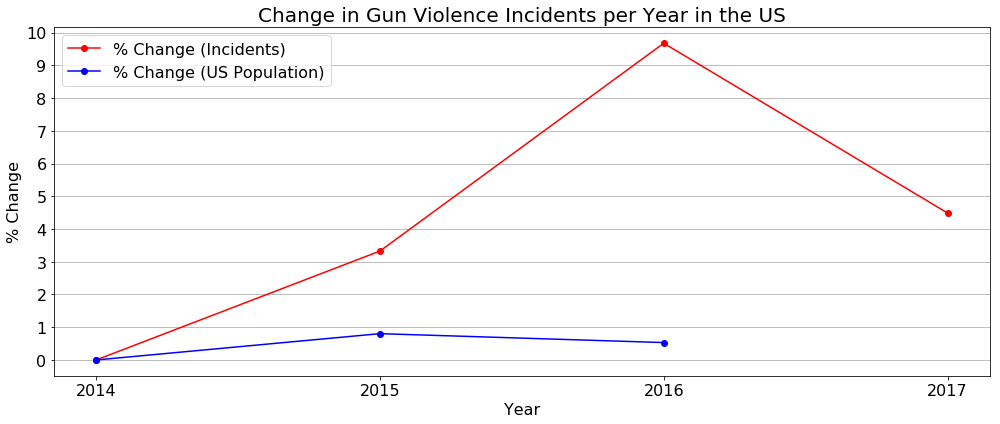

In [23]:
plt.figure(figsize=(14,6))

plt.plot(change_df.index, change_df['% Change (Incidents)'], '-o', c='red')
plt.plot(us_pop_df.index, us_pop_df['% Change (US Population)'], '-o', c='blue')

plt.xticks(change_df.index, fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.yticks(range(0, 11), fontsize=16)
plt.ylabel('% Change', fontsize=16)
plt.title('Change in Gun Violence Incidents per Year in the US', fontsize=20)
plt.grid(axis='y')
plt.legend(fontsize=16)
plt.tight_layout()

plt.savefig('percent_change_national.png')
plt.show()

## Change in Gun Violence vs Population (State)

In [24]:
state_change_df = gva_df.groupby(['state', 'year'])['incident_id'].count().to_frame()
state_change_df.columns = ['# of Incidents']

In [25]:
state_pct_changes = []

for state in state_change_df.index.get_level_values(0).unique():
    
    state_pct_changes.append(state_change_df.loc[state].pct_change())
    
state_change_df['% Change'] =  pd.concat(state_pct_changes)['# of Incidents'].tolist()

state_change_df.head(4)

# of Incidents  % Change
state   year                          
Alabama 2014            1318       NaN
        2015            1034 -0.215478
        2016            1309  0.265957
        2017            1461  0.116119

In [26]:
state_pop_2014_df = pd.read_csv(f'../data_cleaned/age_by_state_2014.csv')[['State', 'Total']]
state_pop_2014_df['Year'] = [2014 for i in range(len(state_pop_2014_df))]

state_pop_2015_df = pd.read_csv(f'../data_cleaned/age_by_state_2015.csv')[['State', 'Total']]
state_pop_2015_df['Year'] = [2015 for i in range(len(state_pop_2015_df))]

state_pop_2016_df = pd.read_csv(f'../data_cleaned/age_by_state_2016.csv')[['State', 'Total']]
state_pop_2016_df['Year'] = [2016 for i in range(len(state_pop_2016_df))]

state_pop_df = pd.concat([state_pop_2014_df, state_pop_2015_df, state_pop_2016_df]).reset_index(drop=True)
state_pop_df = state_pop_df.groupby(['State', 'Year']).sum()

state_pop_pct_changes = []
states = state_pop_df.index.get_level_values(0).unique()

for state in states:

    pop_pct_change = state_pop_df.loc[state].pct_change() * 100
    
    state_pop_pct_changes.append(pop_pct_change)
    
state_pop_df['% Change'] =  pd.concat(state_pop_pct_changes)['Total'].tolist()

# state_pop_df.loc[(states, 2014), '% Change'] = [0 for i in range(51)]

state_pop_df.head(6)

Total  % Change
State   Year                   
Alabama 2014  4849377       NaN
        2015  4858979  0.198005
        2016  4863300  0.088928
Alaska  2014   736732       NaN
        2015   738432  0.230749
        2016   741894  0.468831

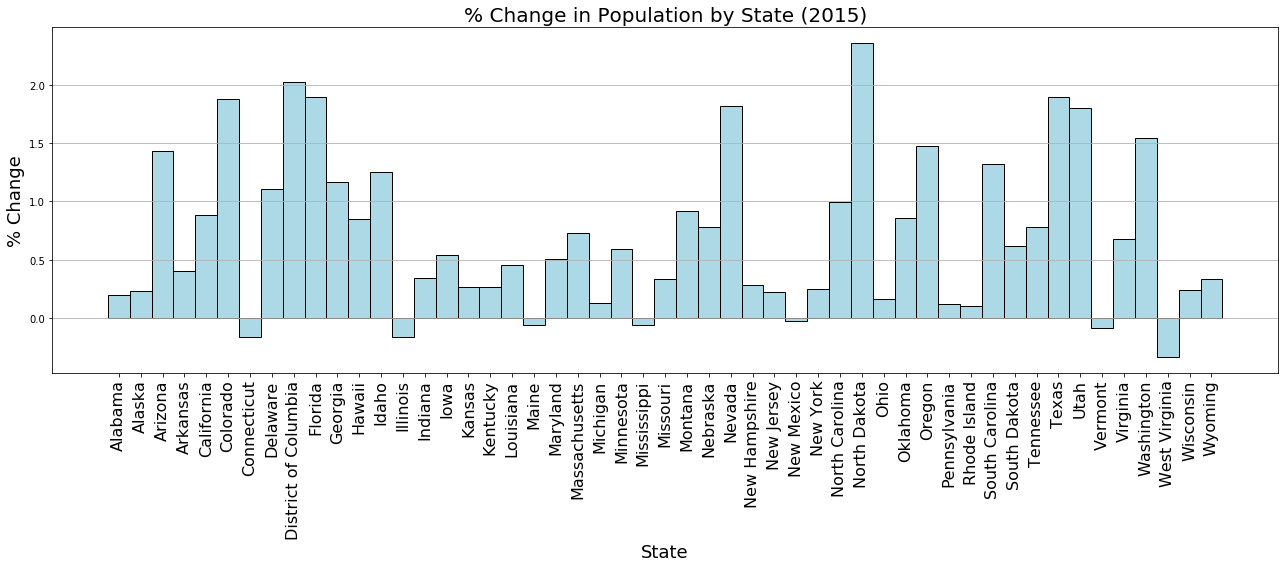

In [27]:
plt.figure(figsize=(18,8))
states = state_pop_df.index.get_level_values(0).unique()

plt.bar(states, state_pop_df.query('Year == 2015')['% Change'], width=1, edgecolor='black', color='lightblue')

plt.xticks(rotation='vertical', fontsize=16)
plt.xlabel('State', fontsize=18)
plt.ylabel('% Change', fontsize=18)
plt.grid(axis='y')
plt.title('% Change in Population by State (2015)', fontsize=20)
plt.tight_layout()

plt.savefig('percent_change_state_pop_2015.png')
plt.show()

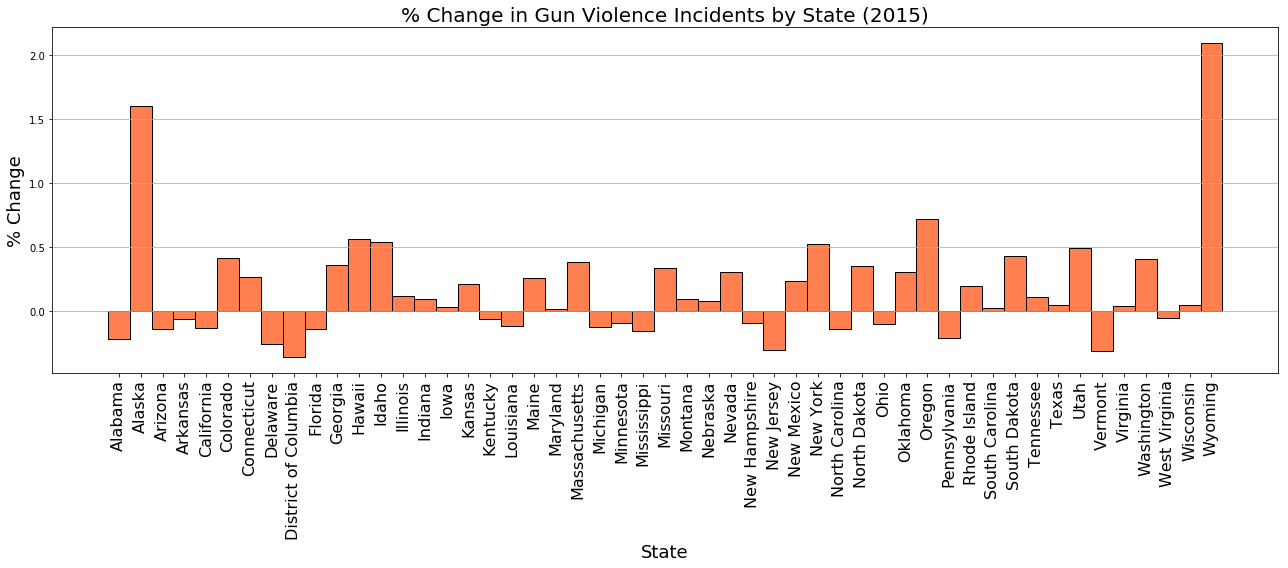

In [28]:
plt.figure(figsize=(18,8))
states = state_change_df.index.get_level_values(0).unique()

plt.bar(states, state_change_df.query('year == 2015')['% Change'], width=1, edgecolor='black', color='coral')

plt.xticks(rotation='vertical', fontsize=16)
plt.xlabel('State', fontsize=18)
plt.ylabel('% Change', fontsize=18)
plt.grid(axis='y')
plt.title('% Change in Gun Violence Incidents by State (2015)', fontsize=20)
plt.tight_layout()

plt.savefig('percent_change_state_gun_violence_2015.png')
plt.show()

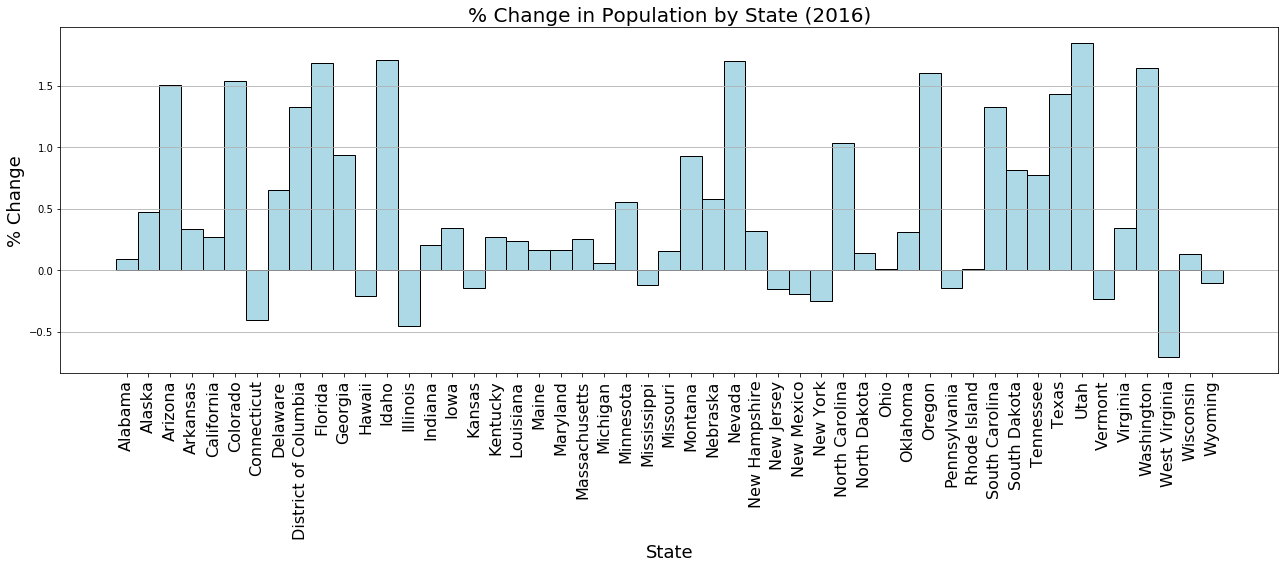

In [29]:
plt.figure(figsize=(18,8))
states = state_pop_df.index.get_level_values(0).unique()

plt.bar(states, state_pop_df.query('Year == 2016')['% Change'], width=1, edgecolor='black', color='lightblue')

plt.xticks(rotation='vertical', fontsize=16)
plt.xlabel('State', fontsize=18)
plt.ylabel('% Change', fontsize=18)
plt.grid(axis='y')
plt.title('% Change in Population by State (2016)', fontsize=20)
plt.tight_layout()

plt.savefig('percent_change_state_pop_2016.png')
plt.show()

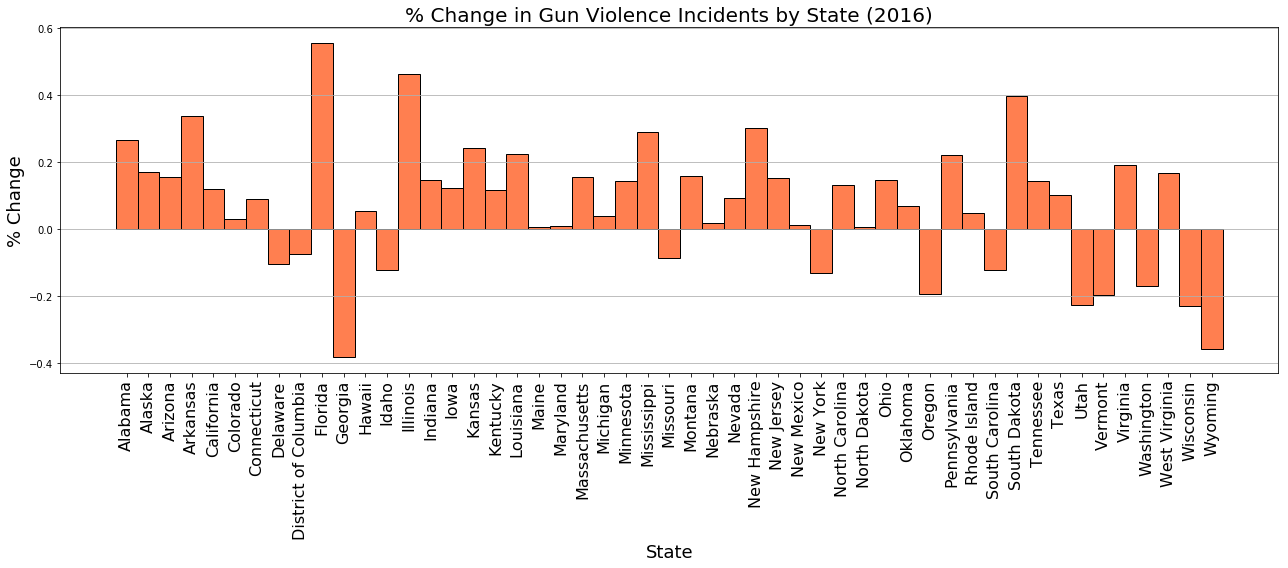

In [30]:
plt.figure(figsize=(18,8))
states = state_change_df.index.get_level_values(0).unique()

plt.bar(states, state_change_df.query('year == 2016')['% Change'], width=1, edgecolor='black', color='coral')

plt.xticks(rotation='vertical', fontsize=16)
plt.xlabel('State', fontsize=18)
plt.ylabel('% Change', fontsize=18)
plt.grid(axis='y')
plt.title('% Change in Gun Violence Incidents by State (2016)', fontsize=20)
plt.tight_layout()

plt.savefig('percent_change_state_gun_violence_2016.png')
plt.show()